# Visualizacion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cardio = pd.read_csv('dataset_cardio.csv')
cardio.head(3)

,edad,género,dolor de pecho,presión sanguínea,colesterol,nivel de glucosa,ECG,Pulso,Angina,depresión ST,curva ST,Vesiculas,Defectos,Resultado
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


* resultado : 0 = sano , 1,2,3,4 = patologia cardiaca

In [3]:
cardio_np = np.array(cardio)

In [4]:
def quality_report(data):

    """This method will do a basic data quality report for a data frame"""
        
    if (type(data) != pd.core.frame.DataFrame):
        raise TypeError("Data must be pandas.core.frame.DataFrame")
    else: 
        columns = list(data.columns.values)
        data_type = pd.DataFrame(data.dtypes, columns=['Data type'])
        missing_data = pd.DataFrame(
        data.isnull().sum(), columns=['missing values'])
        present_data = pd.DataFrame(data.count(), columns=['present values'])
        unique_values = pd.DataFrame(columns=['unique values'])
        minimum_values = pd.DataFrame(columns=['minimum values'])
        max_values = pd.DataFrame(columns=['maximun values'])
        
        for i in columns:
            unique_values.loc[i] = [data[i].nunique()]
            try:
                minimum_values.loc[i] = [data[i].min()]
                max_values.loc[i] = [data[i].max()]
            except:
                pass
        
        DQ_report = data_type.join(missing_data).join(present_data).join(
        unique_values).join(minimum_values).join(max_values)
    
    return DQ_report

In [5]:
quality_report(cardio)

,Data type,missing values,present values,unique values,minimum values,maximun values
edad,float64,0,297,41,29.0,77.0
género,float64,0,297,2,0.0,1.0
dolor de pecho,float64,0,297,4,1.0,4.0
presión sanguínea,float64,0,297,50,94.0,200.0
colesterol,float64,0,297,152,126.0,564.0
nivel de glucosa,float64,0,297,2,0.0,1.0
ECG,float64,0,297,3,0.0,2.0
Pulso,float64,0,297,91,71.0,202.0
Angina,float64,0,297,2,0.0,1.0
depresión ST,float64,0,297,40,0.0,6.2


In [6]:
cardio_np

array([[63.,  1.,  1., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  2.],
       [67.,  1.,  4., ...,  2.,  7.,  1.],
       ...,
       [68.,  1.,  4., ...,  2.,  7.,  2.],
       [57.,  1.,  4., ...,  1.,  7.,  3.],
       [57.,  0.,  2., ...,  1.,  3.,  1.]])

transformar gente '1,2,3,4' a 1

In [7]:
mask = cardio_np[:,13] > 0
cardio_np[:,13][mask] = 1 #utilizar los combios en la columna especifica
cardio_np[:,13]

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

grafico basico

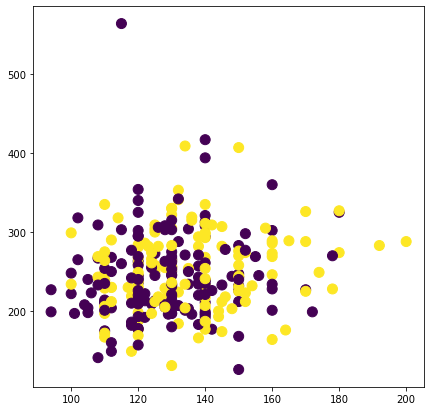

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(cardio_np[:,3], cardio_np[:,4],
            c = cardio_np[:,13], s = 100)

grafico + detallado

primero separar datos:

In [9]:
pacientes_sanos = cardio_np[np.where(cardio_np[:,13]==0)]
pacientes_enfermos = cardio_np[np.where(cardio_np[:,13]==1)]

print('pacientes sanos:')
print(pacientes_sanos.shape)

print('pacientes_enfermos:')
print(pacientes_enfermos.shape)

pacientes sanos:
(160, 14)
pacientes_enfermos:
(137, 14)


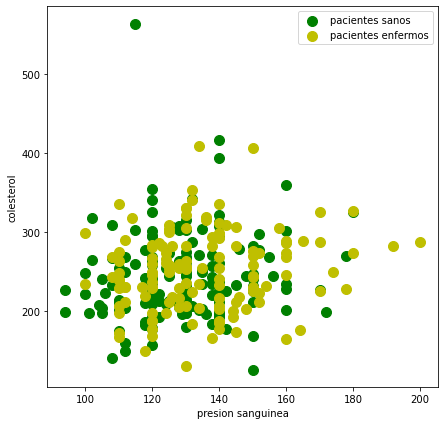

In [10]:
#numero de columna guardado en 2 variables(precion sanguinea y colesterol):
car_x = 3
car_y = 4

plt.figure(figsize = (7,7))  # solo una linea de fig = una grafica
plt.scatter(pacientes_sanos[:,car_x], pacientes_sanos[:,car_y],
           color = 'g', s = 100, label='pacientes sanos')
plt.scatter(pacientes_enfermos[:,car_x], pacientes_enfermos[:,car_y],
           color = 'y', s = 100,label='pacientes enfermos')

plt.xlabel('presion sanguinea')
plt.ylabel('colesterol')

plt.legend(loc = 'upper right')
plt.show()

Graficas genero

In [11]:
cardio.head(3)

,edad,género,dolor de pecho,presión sanguínea,colesterol,nivel de glucosa,ECG,Pulso,Angina,depresión ST,curva ST,Vesiculas,Defectos,Resultado
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [12]:
hombres = cardio_np[np.where(cardio_np[:,1]==1)]
mujeres = cardio_np[np.where(cardio_np[:,1]==0)]

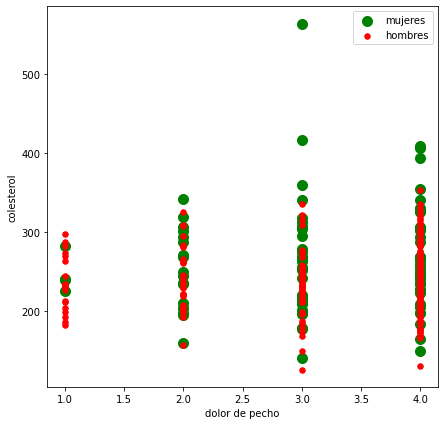

In [13]:
car_x = 2
car_y = 4

plt.figure(figsize = (7,7))  
plt.scatter(mujeres[:,car_x], mujeres[:,car_y],
           color = 'g', s = 100, label='mujeres')
plt.scatter(hombres[:,car_x], hombres[:,car_y],
           color = 'r', s = 30,label='hombres')

plt.xlabel('dolor de pecho')
plt.ylabel('colesterol')

plt.legend(loc = 'upper right')
plt.show()

# subfiguras

In [14]:
def dibujarScatter(axs, caracteristica_x, caracteristica_y):
    columnas = cardio.columns
    print("Plotteando: "+columnas[caracteristica_x]+"(X) vs "+columnas[caracteristica_y]+"(Y)")

    axs.scatter(pacientes_sanos[:,caracteristica_x], pacientes_sanos[:,caracteristica_y], 
                color='r', s=100, label='Pacientes sanos')
    axs.scatter(pacientes_enfermos[:,caracteristica_x], pacientes_enfermos[:,caracteristica_y],
                color='y', s=100, label='Pacientes enfermos')
    
    axs.set_xlabel(columnas[caracteristica_x])
    axs.set_ylabel(columnas[caracteristica_y])
    axs.legend(loc='upper right')
    
   

Plotteando: presión sanguínea(X) vs colesterol(Y)
Plotteando: colesterol(X) vs nivel de glucosa(Y)
Plotteando: nivel de glucosa(X) vs ECG(Y)
Plotteando: ECG(X) vs Pulso(Y)
Plotteando: Pulso(X) vs Angina(Y)
Plotteando: Angina(X) vs depresión ST(Y)
Plotteando: depresión ST(X) vs curva ST(Y)
Plotteando: Vesiculas(X) vs Defectos(Y)
Plotteando: Defectos(X) vs Resultado(Y)


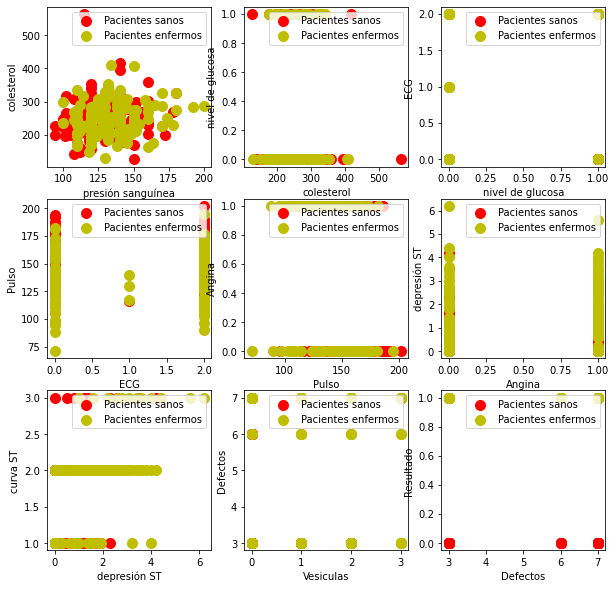

In [15]:
fig, axs = plt.subplots(3, 3,figsize=(10,10))
caracteristica_x = 3
caracteristica_y = 4
dibujarScatter(axs[0,0],caracteristica_x, caracteristica_y)

caracteristica_x = 4
caracteristica_y = 5
dibujarScatter(axs[0,1],caracteristica_x, caracteristica_y)

caracteristica_x = 5
caracteristica_y = 6
dibujarScatter(axs[0,2],caracteristica_x, caracteristica_y)

caracteristica_x = 6
caracteristica_y = 7
dibujarScatter(axs[1,0],caracteristica_x, caracteristica_y)

caracteristica_x = 7
caracteristica_y = 8
dibujarScatter(axs[1,1],caracteristica_x, caracteristica_y)

caracteristica_x = 8
caracteristica_y = 9
dibujarScatter(axs[1,2],caracteristica_x, caracteristica_y)

caracteristica_x = 9
caracteristica_y = 10
dibujarScatter(axs[2,0],caracteristica_x, caracteristica_y)

caracteristica_x = 11
caracteristica_y = 12
dibujarScatter(axs[2,1],caracteristica_x, caracteristica_y)

caracteristica_x = 12
caracteristica_y = 13
dibujarScatter(axs[2,2],caracteristica_x, caracteristica_y)

# Graficas 3D

In [16]:
from mpl_toolkits.mplot3d import Axes3D


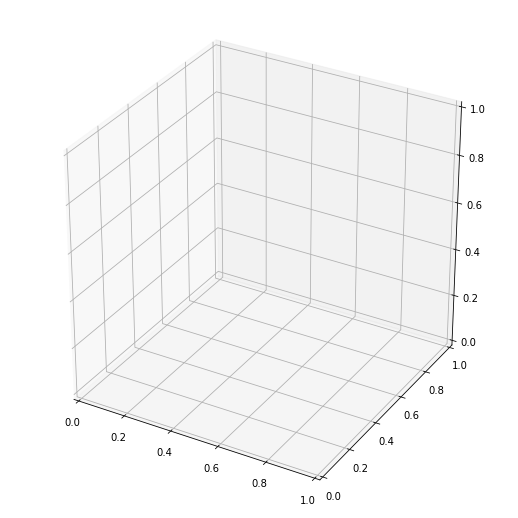

In [17]:
#figura vacía
fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)

In [18]:
caracteristica_x = 3
caracteristica_y = 4
caracteristica_z = 5

Plotteando: presión sanguínea(x)-colesterol(y)-nivel de glucosa(z)


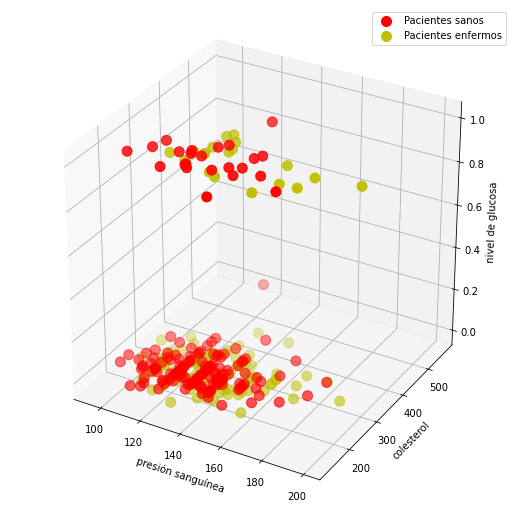

In [19]:
fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)
columnas = cardio.columns
print('Plotteando: '
     +columnas[caracteristica_x]+'(x)-'
     +columnas[caracteristica_y]+'(y)-'
     +columnas[caracteristica_z]+'(z)')
ax.scatter(pacientes_sanos[:,caracteristica_x], 
           pacientes_sanos[:,caracteristica_y],
           pacientes_sanos[:,caracteristica_z],
           color='r', s=100, label='Pacientes sanos')
ax.scatter(pacientes_enfermos[:,caracteristica_x], 
           pacientes_enfermos[:,caracteristica_y],
           pacientes_enfermos[:,caracteristica_z],
           color='y', s=100, label='Pacientes enfermos')
ax.set_xlabel(columnas[caracteristica_x])
ax.set_ylabel(columnas[caracteristica_y])
ax.set_zlabel(columnas[caracteristica_z])
ax.legend(loc='upper right')

# subfiguras 3D

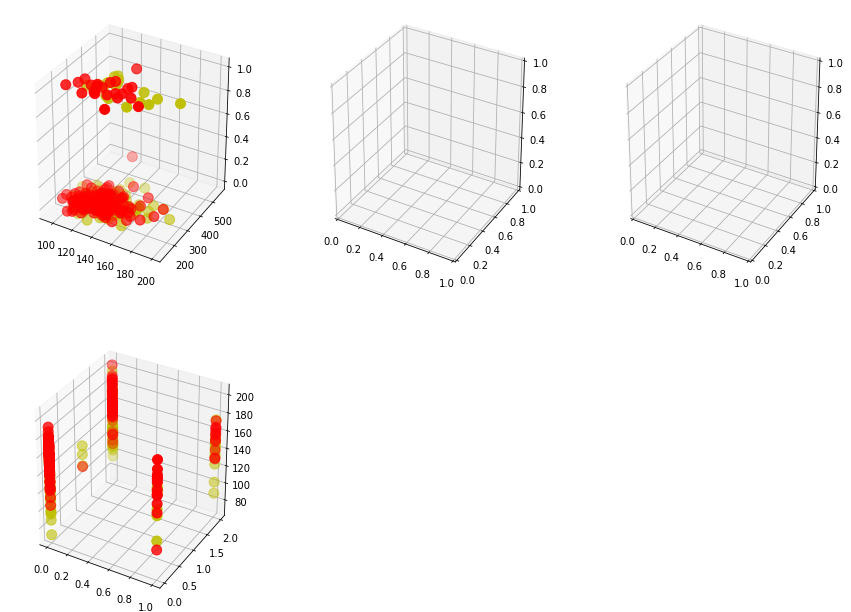

In [20]:
fig = plt.figure(figsize = (15,11))
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
ax3 = fig.add_subplot(2, 3, 3, projection='3d')
ax4 = fig.add_subplot(2, 3, 4, projection='3d')

caracteristica_x = 3
caracteristica_y = 4
caracteristica_z = 5

ax1.scatter(pacientes_sanos[:,caracteristica_x], 
           pacientes_sanos[:,caracteristica_y],
           pacientes_sanos[:,caracteristica_z],
           color='r', s=100, label='Pacientes sanos')
ax1.scatter(pacientes_enfermos[:,caracteristica_x], 
           pacientes_enfermos[:,caracteristica_y],
           pacientes_enfermos[:,caracteristica_z],
           color='y', s=100, label='Pacientes enfermos')

caracteristica_x = 5
caracteristica_y = 6
caracteristica_z = 7

ax4.scatter(pacientes_sanos[:,caracteristica_x], 
           pacientes_sanos[:,caracteristica_y],
           pacientes_sanos[:,caracteristica_z],
           color='r', s=100, label='Pacientes sanos')
ax4.scatter(pacientes_enfermos[:,caracteristica_x], 
           pacientes_enfermos[:,caracteristica_y],
           pacientes_enfermos[:,caracteristica_z],
           color='y', s=100, label='Pacientes enfermos')

## Funcíon

In [21]:
def dibujarScatter3d(row,col,posicion, caracteristica_x, caracteristica_y,caracteristica_z):
    columnas = cardio.columns
    ax = fig.add_subplot(row, col, posicion, projection='3d')
    print("Plotteando: "+columnas[caracteristica_x]+"(X)  "+columnas[caracteristica_y]+"(Y)  "
         +columnas[caracteristica_z]+"(Z)")

    ax.scatter(pacientes_sanos[:,caracteristica_x], 
                   pacientes_sanos[:,caracteristica_y],
                   pacientes_sanos[:,caracteristica_z],
                color='r', s=100, label='Pacientes sanos')
    ax.scatter(pacientes_enfermos[:,caracteristica_x], 
                   pacientes_enfermos[:,caracteristica_y],
                   pacientes_enfermos[:,caracteristica_z],
                color='y', s=100, label='Pacientes enfermos')
    
    ax.set_xlabel(columnas[caracteristica_x])
    ax.set_ylabel(columnas[caracteristica_y])
    ax.set_zlabel(columnas[caracteristica_z])
    ax.legend(loc='upper right')

Plotteando: género(X)  dolor de pecho(Y)  presión sanguínea(Z)
Plotteando: colesterol(X)  nivel de glucosa(Y)  ECG(Z)
Plotteando: Pulso(X)  Angina(Y)  depresión ST(Z)
Plotteando: curva ST(X)  Vesiculas(Y)  Defectos(Z)
Plotteando: Vesiculas(X)  Defectos(Y)  Resultado(Z)
Plotteando: edad(X)  Defectos(Y)  Resultado(Z)
Plotteando: dolor de pecho(X)  curva ST(Y)  Vesiculas(Z)
Plotteando: presión sanguínea(X)  Angina(Y)  depresión ST(Z)
Plotteando: colesterol(X)  ECG(Y)  Pulso(Z)


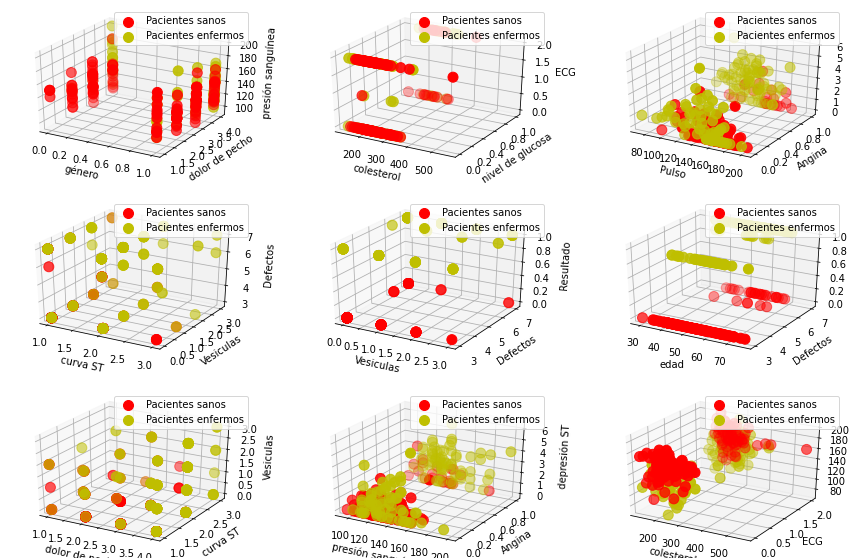

In [28]:
fig = plt.figure(figsize = (15,10))

caracteristica_x = 1
caracteristica_y = 2
caracteristica_z = 3
dibujarScatter3d(3, 3, 1,caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 4
caracteristica_y = 5
caracteristica_z = 6
dibujarScatter3d(3, 3, 2,caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 7
caracteristica_y = 8
caracteristica_z = 9
dibujarScatter3d(3, 3, 3,caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 10
caracteristica_y = 11
caracteristica_z = 12
dibujarScatter3d(3, 3, 4,caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 11
caracteristica_y = 12
caracteristica_z = 13
dibujarScatter3d(3, 3, 5,caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 0
caracteristica_y = 12
caracteristica_z = 13
dibujarScatter3d(3, 3, 6,caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 2
caracteristica_y = 10
caracteristica_z = 11
dibujarScatter3d(3, 3, 7,caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 3
caracteristica_y = 8
caracteristica_z = 9
dibujarScatter3d(3, 3, 8,caracteristica_x, caracteristica_y, caracteristica_z)

caracteristica_x = 4
caracteristica_y = 6
caracteristica_z = 7
dibujarScatter3d(3, 3, 9,caracteristica_x, caracteristica_y, caracteristica_z)

# # Repaso

In [29]:
%matplotlib notebook #ahora se mueve (tambn se puede aplicar con subplots)

In [30]:
caracteristica_x = 3
caracteristica_y = 4
caracteristica_z = 5

<IPython.core.display.Javascript object>


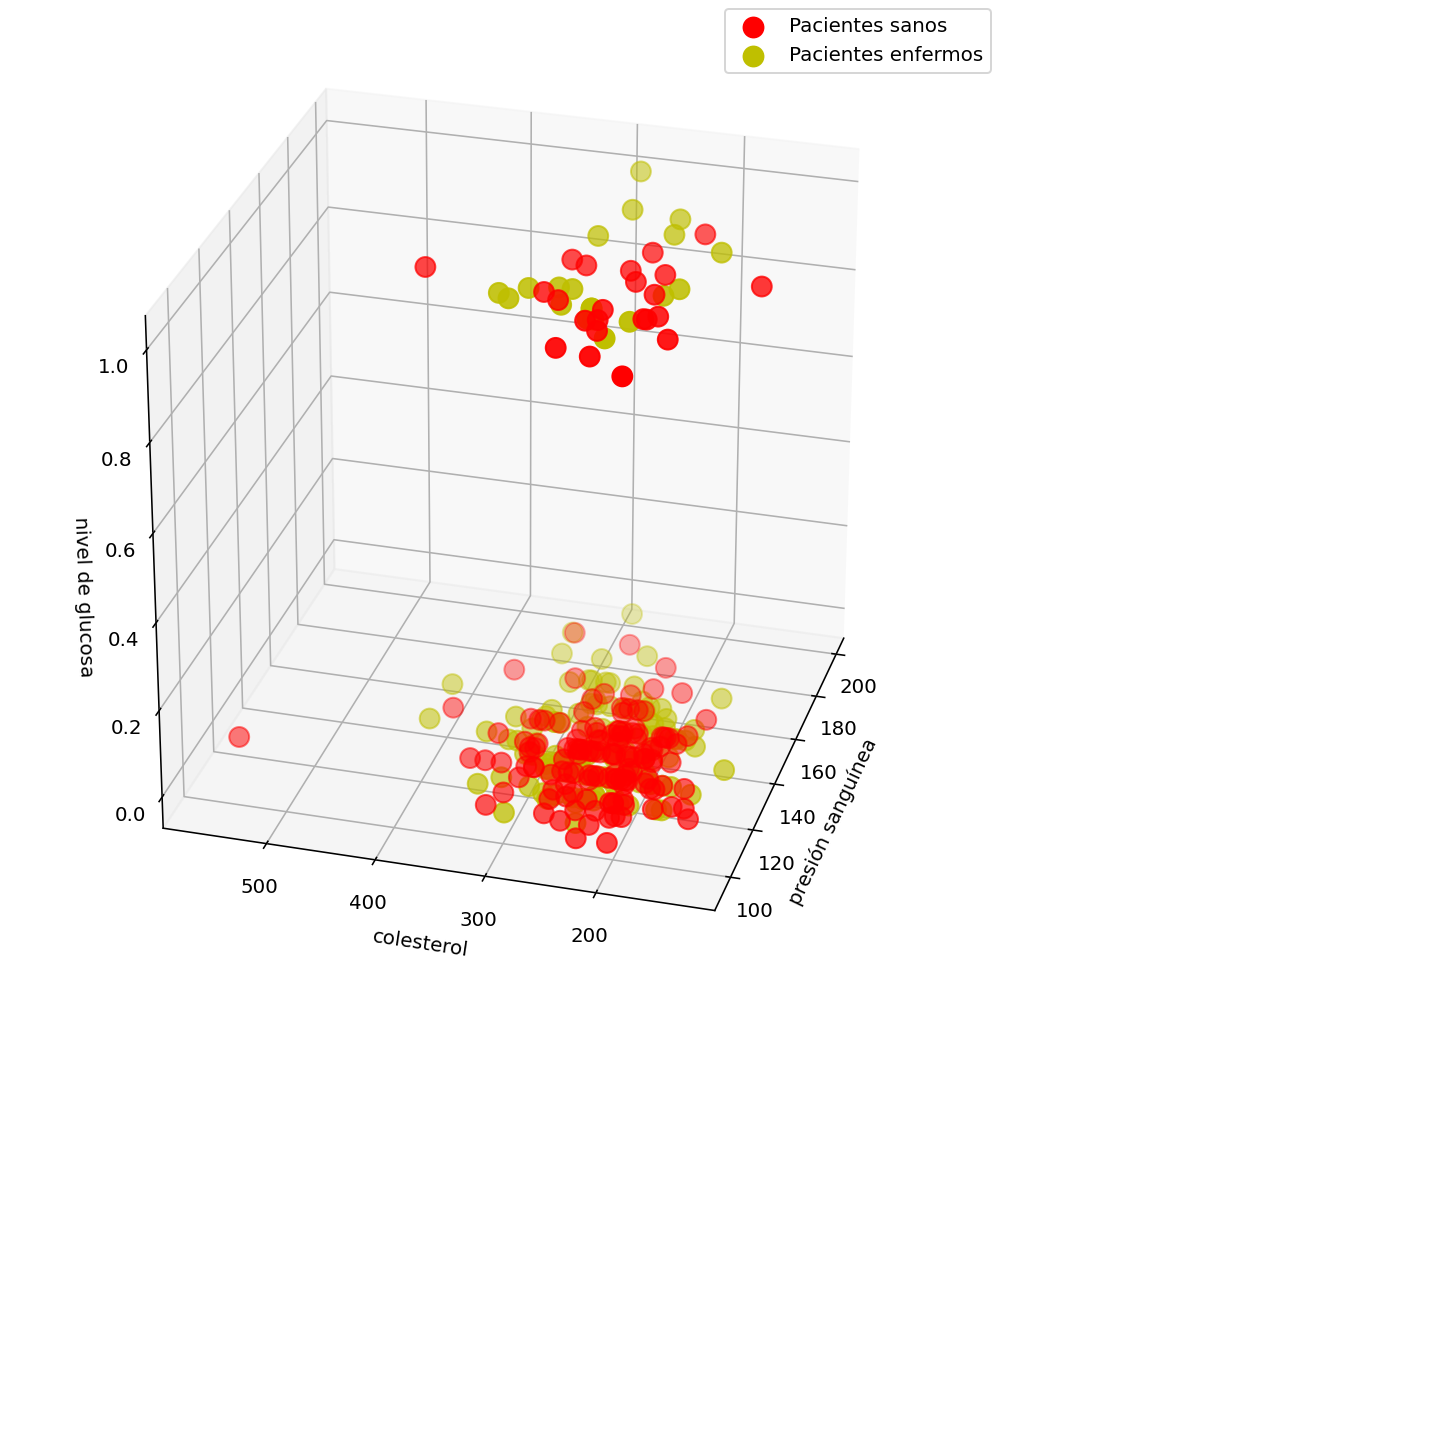

Plotteando: presión sanguínea(x)-colesterol(y)-nivel de glucosa(z)


In [31]:
fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)
columnas = cardio.columns
print('Plotteando: '
     +columnas[caracteristica_x]+'(x)-'
     +columnas[caracteristica_y]+'(y)-'
     +columnas[caracteristica_z]+'(z)')
ax.scatter(pacientes_sanos[:,caracteristica_x], 
           pacientes_sanos[:,caracteristica_y],
           pacientes_sanos[:,caracteristica_z],
           color='r', s=100, label='Pacientes sanos')
ax.scatter(pacientes_enfermos[:,caracteristica_x], 
           pacientes_enfermos[:,caracteristica_y],
           pacientes_enfermos[:,caracteristica_z],
           color='y', s=100, label='Pacientes enfermos')
ax.set_xlabel(columnas[caracteristica_x])
ax.set_ylabel(columnas[caracteristica_y])
ax.set_zlabel(columnas[caracteristica_z])
ax.legend(loc='upper right')